# Incedios en distritos forestales gallegos en función de especies y variables ambientales

# Pr

Entrenaremos a un modelo con datos disponibles 
Utilizaremos el algoritmo para ver si predice menos incendios para una menor abundancia de eucaliptos

In [1]:
import pandas as pd
import numpy as np

In [2]:
# El archivo que queremos abrir está en la misma carpeta que el código desde el que lo abro
# Ojo con los excel: mejor que esten en una esquina

df = pd.read_excel("df_incendios_galicia_0.xls")

# hay un problema con el nombrado de columnas, algunas se importan con espacio y saltos de línea
# Esto nos impide llamarlas para hacer operaciones con ellas
# La función strip elimina espacios innecesarios 

df.columns = [x.strip() for x in df.columns]


In [3]:
pd.set_option('display.max_columns', 100)
df.head(10)

,DISTRITO,num_distr,provincia,num_montes_publicos,superficie_montes_ publicos,num_montes_man_comun,ha_man_comun,superficie_media_ha,ha_monte_particular,m3_aproveitam_privado_19_partic_comun,venta_privada_quemada_18,venta_privada_seca_18,venta_privada_verde_18,privada_total_18,venta_privada_quemada_19,venta_privada_seca_19,venta_privada_verde_19,venta_privada_total_19,Pinus pinaster tot m3 18,Pinus radiata tot m3 18,Pinus sylvestris tot m3 18,Outras coníferas tot m3 18,Caducifolias tot m3 18,Eucalyptus tot m3 18,Outras frondosas tot m3 18,Pinus pinaster tot m3 19,Pinus radiata tot m3 19,Pinus sylvestris tot m3 19,mestura coníferas tot m3 19,caducifolias tot m3 19,Eucalyptus spp. tot m3 19,Outras frondosas tot m3 19,Total_M³ public+privad 19,Ha_incendios_2007,Ha_incendios_2008,Ha_incendios_2009,Ha_incendios_2010,Ha_incendios_2011,Ha_incendios_2012,Ha_incendios_2013,Ha_incendios_2014,Ha_incendios_2015,Ha_incendios_2016,Ha_incendios_2017,Ha_incendios_2018,Ha_incendios_2019,hs sol anual maxima,Hs sol anual min,Dias sol media anual,Precipit anual media,% ocup medio coniferas,% ocup medio frond_peren,% ocup medio cadicifolias,% ocup hipotetico coniferas,% ocup hipotetico frond_peren,% ocup hipotetico cadicifolias
0,Ferrol,1,A coruña,33,8939.77,15,4952.62,330.17,85072,1339840.964,1344.00,275.00,1319825.77,1321444.77,2325.50,1478.36,1336037.10,1339840.96,60651.93,40987.09,971.50,23582.26,20197.44,1178102.14,697.54,83365.59,64885.54,129.52,12590.87,17342.24,1166256.70,336.16,1344906.62,106.8,62.9,144.2,222.39,345.03,1097.71,85.97,59.95,183.16,125.53,771.90,75.45,99.39,2233,1800,230,1780,5,65,10,5,5,70
1,Bergantiños - Mariñas Coruñesas,2,A coruña,32,2880.01,23,3145.99,136.78,90980,1300570.334,2975.70,439.43,1397513.74,1400928.87,644.50,1008.48,1298917.36,1300570.33,218918.80,55389.35,1500.51,33821.24,26633.65,1063183.09,1482.23,219174.31,62925.63,3,27079.35,28694.04,961202.62,2024.05,1301103.00,126.3,219.6,219.4,194.57,544.19,373.93,303.29,45.66,183.02,124.70,244.02,35.87,116.15,2184,1906,240,1500,27,28,16,3,3,65
2,Santiago - Meseta Interior,3,A coruña,22,4540.53,15,3919.24,261.28,96731,1021284.824,5275.48,3186.64,1016745.64,1025207.76,711.99,240.92,1020331.91,1021284.82,169313.75,79882.12,2294.70,47450.21,34076.99,691416.87,971.11,180427.09,76268.66,401.76,30882.88,27639.95,705094.59,960.94,1021675.87,185.4,125.8,343.8,350.20,555.91,307.93,546.15,101.93,1040.73,1130.00,402.24,60.57,87.79,2287,1958,235,1750,22,32,24,4,4,70
3,Barbanza,4,A coruña,24,5873.80,167,24703.18,147.92,73426,353868.814,1258.45,560.04,309697.67,311516.16,27661.37,394.24,325813.21,353868.81,94647.69,5147.22,0.00,8486.23,8556.94,199480.73,1079.77,106224.63,12139.28,-,11634.07,5637.46,227118.20,1231.19,363984.82,29.9,21.6,79.6,1292.56,493.97,244.73,2216.28,68.97,306.95,2023.82,763.82,70.07,1842.92,2411,2184,235,2200,33,29,9,2,2,68
4,Fisterra,5,NaN,31,5064.93,77,11350.17,147.40,79115,395093.878,97.20,3602.73,412214.04,415913.97,2074.70,5504.28,387514.90,395093.88,122744.02,19675.51,87.00,2536.42,6357.44,261516.58,3017.29,131412.01,24205.93,22,3044.22,4569.46,233555.81,2510.99,399320.42,610.6,123.8,213.5,1348.38,407.42,297.73,2449.65,46.85,264.23,411.70,73.06,124.23,332.04,2267,2069,225,2150,15,18,8,2,2,37
5,A Mariña Lucense,6,lugo,3,1581.00,56,19819.77,353.92,77478,1266206.999,2623.30,15.55,1454087.08,1456725.93,3166.67,5147.90,1257892.43,1266207.00,103055.16,112428.10,8240.65,2088.17,8720.54,1220491.35,1701.98,80249.39,98009.11,16237.75,964.02,8716.17,1066339.88,1057.38,1271573.69,30.3,8.5,22.4,41.83,44.12,16.03,10.01,141.01,156.23,48.56,94.38,6.74,31.80,1998,1613,240,1550,12,69,7,4,4,80
6,A Fonsagrada - Os Ancares,7,lugo,33,3279.46,282,45933.27,162.88,84321,337178.151,20.50,56.25,288642.74,288719.49,0.90,806.46,336370.79,337178.15,7792.56,159391.49,74836.39,2030.45,9785.50,70402.85,21.40,15612.66,194410.92,79390.41,1261.61,7273.73,61185.55,3.44,359138.32,59.3,271.0,433.6,189.95,371.93,619.21,1101.64,15.88,538.84,388.27,4661.50,100.76,41.68,2200,1956,245,1500,15,4,69,4

In [4]:
# Lo primero: hacer media anual de incendios
# Definimos las columnas de las que quiero hacer media:

ha_cols = [
    "Ha_incendios_2007", "Ha_incendios_2008", "Ha_incendios_2009", "Ha_incendios_2010", 
    "Ha_incendios_2011", "Ha_incendios_2012", "Ha_incendios_2013", "Ha_incendios_2014", 
    "Ha_incendios_2015", "Ha_incendios_2016", "Ha_incendios_2017", "Ha_incendios_2018", 
    "Ha_incendios_2019"
]

# Y hacemos sobre ellas un apply(mean)

# df[ha_cols].apply('mean', axis=1)

# Estaría bien meter en el df esta columna

df["Media_incendios_07_19"] = df[ha_cols].apply('mean', axis=1)

# La función np.mean de numpy también vale:

# np.mean(df[ha_cols], axis = 1)

# Nótese que axis=1 da la orden de trabajar en horizontal: media de anual de incendios por distrito
# Axis=0 nos daría la media de incendios entre distritos para cada año

In [5]:
df.head(6)

,DISTRITO,num_distr,provincia,num_montes_publicos,superficie_montes_ publicos,num_montes_man_comun,ha_man_comun,superficie_media_ha,ha_monte_particular,m3_aproveitam_privado_19_partic_comun,venta_privada_quemada_18,venta_privada_seca_18,venta_privada_verde_18,privada_total_18,venta_privada_quemada_19,venta_privada_seca_19,venta_privada_verde_19,venta_privada_total_19,Pinus pinaster tot m3 18,Pinus radiata tot m3 18,Pinus sylvestris tot m3 18,Outras coníferas tot m3 18,Caducifolias tot m3 18,Eucalyptus tot m3 18,Outras frondosas tot m3 18,Pinus pinaster tot m3 19,Pinus radiata tot m3 19,Pinus sylvestris tot m3 19,mestura coníferas tot m3 19,caducifolias tot m3 19,Eucalyptus spp. tot m3 19,Outras frondosas tot m3 19,Total_M³ public+privad 19,Ha_incendios_2007,Ha_incendios_2008,Ha_incendios_2009,Ha_incendios_2010,Ha_incendios_2011,Ha_incendios_2012,Ha_incendios_2013,Ha_incendios_2014,Ha_incendios_2015,Ha_incendios_2016,Ha_incendios_2017,Ha_incendios_2018,Ha_incendios_2019,hs sol anual maxima,Hs sol anual min,Dias sol media anual,Precipit anual media,% ocup medio coniferas,% ocup medio frond_peren,% ocup medio cadicifolias,% ocup hipotetico coniferas,% ocup hipotetico frond_peren,% ocup hipotetico cadicifolias,Media_incendios_07_19
0,Ferrol,1,A coruña,33,8939.77,15,4952.62,330.17,85072,1339840.964,1344.00,275.00,1319825.77,1321444.77,2325.50,1478.36,1336037.10,1339840.96,60651.93,40987.09,971.50,23582.26,20197.44,1178102.14,697.54,83365.59,64885.54,129.52,12590.87,17342.24,1166256.70,336.16,1344906.62,106.8,62.9,144.2,222.39,345.03,1097.71,85.97,59.95,183.16,125.53,771.90,75.45,99.39,2233,1800,230,1780,5,65,10,5,5,70,260.029231
1,Bergantiños - Mariñas Coruñesas,2,A coruña,32,2880.01,23,3145.99,136.78,90980,1300570.334,2975.70,439.43,1397513.74,1400928.87,644.50,1008.48,1298917.36,1300570.33,218918.80,55389.35,1500.51,33821.24,26633.65,1063183.09,1482.23,219174.31,62925.63,3,27079.35,28694.04,961202.62,2024.05,1301103.00,126.3,219.6,219.4,194.57,544.19,373.93,303.29,45.66,183.02,124.70,244.02,35.87,116.15,2184,1906,240,1500,27,28,16,3,3,65,210.053846
2,Santiago - Meseta Interior,3,A coruña,22,4540.53,15,3919.24,261.28,96731,1021284.824,5275.48,3186.64,1016745.64,1025207.76,711.99,240.92,1020331.91,1021284.82,169313.75,79882.12,2294.70,47450.21,34076.99,691416.87,971.11,180427.09,76268.66,401.76,30882.88,27639.95,705094.59,960.94,1021675.87,185.4,125.8,343.8,350.20,555.91,307.93,546.15,101.93,1040.73,1130.00,402.24,60.57,87.79,2287,1958,235,1750,22,32,24,4,4,70,402.957692
3,Barbanza,4,A coruña,24,5873.80,167,24703.18,147.92,73426,353868.814,1258.45,560.04,309697.67,311516.16,27661.37,394.24,325813.21,353868.81,94647.69,5147.22,0.00,8486.23,8556.94,199480.73,1079.77,106224.63,12139.28,-,11634.07,5637.46,227118.20,1231.19,363984.82,29.9,21.6,79.6,1292.56,493.97,244.73,2216.28,68.97,306.95,2023.82,763.82,70.07,1842.92,2411,2184,235,2200,33,29,9,2,2,68,727.322308
4,Fisterra,5,NaN,31,5064.93,77,11350.17,147.40,79115,395093.878,97.20,3602.73,412214.04,415913.97,2074.70,5504.28,387514.90,395093.88,122744.02,19675.51,87.00,2536.42,6357.44,261516.58,3017.29,131412.01,24205.93,22,3044.22,4569.46,233555.81,2510.99,399320.42,610.6,123.8,213.5,1348.38,407.42,297.73,2449.65,46.85,264.23,411.70,73.06,124.23,332.04,2267,2069,225,2150,15,18,8,2,2,37,515.630000
5,A Mariña Lucense,6,lugo,3,1581.00,56,19819.77,353.92,77478,1266206.999,2623.30,15.55,1454087.08,1456725.93,3166.67,5147.90,1257892.43,1266207.00,103055.16,112428.10,8240.65,2088.17,8720.54,1220491.35,1701.98,80249.39,98009.11,16237.75,964.02,8716.17,1066339.88,1057.38,1271573.69,30.3,8.5,22.4,41.83,44.12,16.03,10.01,141.01,156.23,48.56,94.38,6.74,31.80,1998,1613,240,1550,12,69,7,4,4,80,50.146923


In [6]:
# Salió bien. Ahora repetiremos el proceso para otras variables:
# Hctareas totales por distrito, produccion anual media por grupo de especies( eucalipto, coniferas, caducifolias)
# alguna cosilla más?

# Empezaremos con medias de coniferas

Conif_explo_cols = ["Pinus pinaster tot m3 18", "Pinus radiata tot m3 18", "Pinus sylvestris tot m3 18", 
                    "Outras coníferas tot m3 18", "Outras frondosas tot m3 18", "Pinus pinaster tot m3 19", 
                    "Pinus radiata tot m3 19", "Pinus sylvestris tot m3 19", "mestura coníferas tot m3 19"
                   ]
df["Media_explot_conif_18_19"] = df[Conif_explo_cols].apply('mean', axis=1)

# Usamos la misma sintaxis para eucaliptos y caducifolias (dejaremos fuera "otras" por ser muy inferior)

Eucalipt_explo_cols = ["Eucalyptus tot m3 18", "Eucalyptus spp. tot m3 19"
                   ]
df["Media_explot_eucalipt_18_19"] = df[Eucalipt_explo_cols].apply('mean', axis=1)


Caducif_explo_cols = ["Caducifolias tot m3 18", "caducifolias tot m3 19"]

df["Media_explot_Caducif_18_19"] = df[Caducif_explo_cols].apply('mean', axis=1)



In [7]:
df.head(5)

,DISTRITO,num_distr,provincia,num_montes_publicos,superficie_montes_ publicos,num_montes_man_comun,ha_man_comun,superficie_media_ha,ha_monte_particular,m3_aproveitam_privado_19_partic_comun,venta_privada_quemada_18,venta_privada_seca_18,venta_privada_verde_18,privada_total_18,venta_privada_quemada_19,venta_privada_seca_19,venta_privada_verde_19,venta_privada_total_19,Pinus pinaster tot m3 18,Pinus radiata tot m3 18,Pinus sylvestris tot m3 18,Outras coníferas tot m3 18,Caducifolias tot m3 18,Eucalyptus tot m3 18,Outras frondosas tot m3 18,Pinus pinaster tot m3 19,Pinus radiata tot m3 19,Pinus sylvestris tot m3 19,mestura coníferas tot m3 19,caducifolias tot m3 19,Eucalyptus spp. tot m3 19,Outras frondosas tot m3 19,Total_M³ public+privad 19,Ha_incendios_2007,Ha_incendios_2008,Ha_incendios_2009,Ha_incendios_2010,Ha_incendios_2011,Ha_incendios_2012,Ha_incendios_2013,Ha_incendios_2014,Ha_incendios_2015,Ha_incendios_2016,Ha_incendios_2017,Ha_incendios_2018,Ha_incendios_2019,hs sol anual maxima,Hs sol anual min,Dias sol media anual,Precipit anual media,% ocup medio coniferas,% ocup medio frond_peren,% ocup medio cadicifolias,% ocup hipotetico coniferas,% ocup hipotetico frond_peren,% ocup hipotetico cadicifolias,Media_incendios_07_19,Media_explot_conif_18_19,Media_explot_eucalipt_18_19,Media_explot_Caducif_18_19
0,Ferrol,1,A coruña,33,8939.77,15,4952.62,330.17,85072,1339840.964,1344.00,275.00,1319825.77,1321444.77,2325.50,1478.36,1336037.10,1339840.96,60651.93,40987.09,971.50,23582.26,20197.44,1178102.14,697.54,83365.59,64885.54,129.52,12590.87,17342.24,1166256.70,336.16,1344906.62,106.8,62.9,144.2,222.39,345.03,1097.71,85.97,59.95,183.16,125.53,771.90,75.45,99.39,2233,1800,230,1780,5,65,10,5,5,70,260.029231,35966.54000,1172179.420,18769.840
1,Bergantiños - Mariñas Coruñesas,2,A coruña,32,2880.01,23,3145.99,136.78,90980,1300570.334,2975.70,439.43,1397513.74,1400928.87,644.50,1008.48,1298917.36,1300570.33,218918.80,55389.35,1500.51,33821.24,26633.65,1063183.09,1482.23,219174.31,62925.63,3,27079.35,28694.04,961202.62,2024.05,1301103.00,126.3,219.6,219.4,194.57,544.19,373.93,303.29,45.66,183.02,124.70,244.02,35.87,116.15,2184,1906,240,1500,27,28,16,3,3,65,210.053846,77536.42750,1012192.855,27663.845
2,Santiago - Meseta Interior,3,A coruña,22,4540.53,15,3919.24,261.28,96731,1021284.824,5275.48,3186.64,1016745.64,1025207.76,711.99,240.92,1020331.91,1021284.82,169313.75,79882.12,2294.70,47450.21,34076.99,691416.87,971.11,180427.09,76268.66,401.76,30882.88,27639.95,705094.59,960.94,1021675.87,185.4,125.8,343.8,350.20,555.91,307.93,546.15,101.93,1040.73,1130.00,402.24,60.57,87.79,2287,1958,235,1750,22,32,24,4,4,70,402.957692,73436.31500,698255.730,30858.470
3,Barbanza,4,A coruña,24,5873.80,167,24703.18,147.92,73426,353868.814,1258.45,560.04,309697.67,311516.16,27661.37,394.24,325813.21,353868.81,94647.69,5147.22,0.00,8486.23,8556.94,199480.73,1079.77,106224.63,12139.28,-,11634.07,5637.46,227118.20,1231.19,363984.82,29.9,21.6,79.6,1292.56,493.97,244.73,2216.28,68.97,306.95,2023.82,763.82,70.07,1842.92,2411,2184,235,2200,33,29,9,2,2,68,727.322308,29919.86125,213299.465,7097.200
4,Fisterra,5,NaN,31,5064.93,77,11350.17,147.40,79115,395093.878,97.20,3602.73,412214.04,415913.97,2074.70,5504.28,387514.90,395093.88,122744.02,19675.51,87.00,2536.42,6357.44,261516.58,3017.29,131412.01,24205.93,22,3044.22,4569.46,233555.81,2510.99,399320.42,610.6,123.8,213.5,1348.38,407.42,297.73,2449.65,46.85,264.23,411.70,73.06,124.23,332.04,2267,2069,225,2150,15,18,8,2,2,37,515.630000,38340.30000,247536.195,5463.450


In [8]:
# Ahora hacer lo mismo con la superficie. En este caso será una suma en vez de una media

Sup_for_cols = ["superficie_montes_ publicos","ha_man_comun","ha_monte_particular"]

df["Sup_forest_distrit"] = df[Sup_for_cols].apply('sum', axis=1)


In [9]:
df.head(5)

,DISTRITO,num_distr,provincia,num_montes_publicos,superficie_montes_ publicos,num_montes_man_comun,ha_man_comun,superficie_media_ha,ha_monte_particular,m3_aproveitam_privado_19_partic_comun,venta_privada_quemada_18,venta_privada_seca_18,venta_privada_verde_18,privada_total_18,venta_privada_quemada_19,venta_privada_seca_19,venta_privada_verde_19,venta_privada_total_19,Pinus pinaster tot m3 18,Pinus radiata tot m3 18,Pinus sylvestris tot m3 18,Outras coníferas tot m3 18,Caducifolias tot m3 18,Eucalyptus tot m3 18,Outras frondosas tot m3 18,Pinus pinaster tot m3 19,Pinus radiata tot m3 19,Pinus sylvestris tot m3 19,mestura coníferas tot m3 19,caducifolias tot m3 19,Eucalyptus spp. tot m3 19,Outras frondosas tot m3 19,Total_M³ public+privad 19,Ha_incendios_2007,Ha_incendios_2008,Ha_incendios_2009,Ha_incendios_2010,Ha_incendios_2011,Ha_incendios_2012,Ha_incendios_2013,Ha_incendios_2014,Ha_incendios_2015,Ha_incendios_2016,Ha_incendios_2017,Ha_incendios_2018,Ha_incendios_2019,hs sol anual maxima,Hs sol anual min,Dias sol media anual,Precipit anual media,% ocup medio coniferas,% ocup medio frond_peren,% ocup medio cadicifolias,% ocup hipotetico coniferas,% ocup hipotetico frond_peren,% ocup hipotetico cadicifolias,Media_incendios_07_19,Media_explot_conif_18_19,Media_explot_eucalipt_18_19,Media_explot_Caducif_18_19,Sup_forest_distrit
0,Ferrol,1,A coruña,33,8939.77,15,4952.62,330.17,85072,1339840.964,1344.00,275.00,1319825.77,1321444.77,2325.50,1478.36,1336037.10,1339840.96,60651.93,40987.09,971.50,23582.26,20197.44,1178102.14,697.54,83365.59,64885.54,129.52,12590.87,17342.24,1166256.70,336.16,1344906.62,106.8,62.9,144.2,222.39,345.03,1097.71,85.97,59.95,183.16,125.53,771.90,75.45,99.39,2233,1800,230,1780,5,65,10,5,5,70,260.029231,35966.54000,1172179.420,18769.840,98964.39
1,Bergantiños - Mariñas Coruñesas,2,A coruña,32,2880.01,23,3145.99,136.78,90980,1300570.334,2975.70,439.43,1397513.74,1400928.87,644.50,1008.48,1298917.36,1300570.33,218918.80,55389.35,1500.51,33821.24,26633.65,1063183.09,1482.23,219174.31,62925.63,3,27079.35,28694.04,961202.62,2024.05,1301103.00,126.3,219.6,219.4,194.57,544.19,373.93,303.29,45.66,183.02,124.70,244.02,35.87,116.15,2184,1906,240,1500,27,28,16,3,3,65,210.053846,77536.42750,1012192.855,27663.845,97006.00
2,Santiago - Meseta Interior,3,A coruña,22,4540.53,15,3919.24,261.28,96731,1021284.824,5275.48,3186.64,1016745.64,1025207.76,711.99,240.92,1020331.91,1021284.82,169313.75,79882.12,2294.70,47450.21,34076.99,691416.87,971.11,180427.09,76268.66,401.76,30882.88,27639.95,705094.59,960.94,1021675.87,185.4,125.8,343.8,350.20,555.91,307.93,546.15,101.93,1040.73,1130.00,402.24,60.57,87.79,2287,1958,235,1750,22,32,24,4,4,70,402.957692,73436.31500,698255.730,30858.470,105190.77
3,Barbanza,4,A coruña,24,5873.80,167,24703.18,147.92,73426,353868.814,1258.45,560.04,309697.67,311516.16,27661.37,394.24,325813.21,353868.81,94647.69,5147.22,0.00,8486.23,8556.94,199480.73,1079.77,106224.63,12139.28,-,11634.07,5637.46,227118.20,1231.19,363984.82,29.9,21.6,79.6,1292.56,493.97,244.73,2216.28,68.97,306.95,2023.82,763.82,70.07,1842.92,2411,2184,235,2200,33,29,9,2,2,68,727.322308,29919.86125,213299.465,7097.200,104002.98
4,Fisterra,5,NaN,31,5064.93,77,11350.17,147.40,79115,395093.878,97.20,3602.73,412214.04,415913.97,2074.70,5504.28,387514.90,395093.88,122744.02,19675.51,87.00,2536.42,6357.44,261516.58,3017.29,131412.01,24205.93,22,3044.22,4569.46,233555.81,2510.99,399320.42,610.6,123.8,213.5,1348.38,407.42,297.73,2449.65,46.85,264.23,411.70,73.06,124.23,332.04,2267,2069,225,2150,15,18,8,2,2,37,515.630000,38340.30000,247536.195,5463.450,95530.10


In [10]:
# df_0 es un df sencillo de medias (no datos) anuales
# Si se requiere más filas, crearemos Df_1: un df con años en las filas, uno para cada ristra de 19 distritos
# eso dará un total de 19 (distritos) x 13 (años con datos de incendios anuales por distrito) = 247 filas
# Siempre que consigamos datos climáticos suficientes... las abundancias de especies serán constantes en el tiempo


# Iremos quitando lo que no necesitamos para este df_0


# df_0 = df.drop(["Pinus pinaster tot m3 18", "Pinus radiata tot m3 18", "Pinus sylvestris tot m3 18", 
#                    "Outras coníferas tot m3 18", "Outras frondosas tot m3 18", "Pinus pinaster tot m3 19", 
#                    "Pinus radiata tot m3 19", "Pinus sylvestris tot m3 19", "mestura coníferas tot m3 19"    
# ], axis = 1)

# df_0 = df.drop([
#    "Ha_incendios_2007", "Ha_incendios_2008", "Ha_incendios_2009", "Ha_incendios_2010", 
#    "Ha_incendios_2011", "Ha_incendios_2012", "Ha_incendios_2013", "Ha_incendios_2014", 
#    "Ha_incendios_2015", "Ha_incendios_2016", "Ha_incendios_2017", "Ha_incendios_2018", 
#    "Ha_incendios_2019"
# ], axis = 1)


# Hubo un pequeño lío al eliminar las columnas con las que hacemos las medias: 
# o no borra las columnas con las que creamos medias anuales (incendios), 
# o no permite crear columnas si nos borra las que ya no necesitamos las que que creamos (coniferas)

# Lo que haremos, una vez tengamos todas las medias, es crear un nuevo df, df_0, sin eliminar nada.
# seleccionando las columnas que necesitaremos para aplicar machine learning.

# Selecionamos pocas variables para no confundir al modelo. Descartamos: 
# estructura de la propiedad, estado de la madera...


df_0 = df[["DISTRITO", "num_distr", "Sup_forest_distrit", "superficie_montes_ publicos",
           "ha_man_comun", "ha_monte_particular","Media_explot_conif_18_19",
           "Media_explot_eucalipt_18_19", "Media_explot_Caducif_18_19",
           "% ocup medio coniferas", "% ocup medio frond_peren", "% ocup medio cadicifolias",
           "hs sol anual maxima", "Hs sol anual min", "Dias sol media anual",
           "Precipit anual media", "% ocup hipotetico coniferas",
           "% ocup hipotetico frond_peren", "% ocup hipotetico cadicifolias",
            "Media_incendios_07_19"]]


df_0["Proporcion_man_comun"] =  df_0["ha_man_comun"] / df_0["Sup_forest_distrit"] 
df_0["Proporcion_quemada"] =  df_0["Media_incendios_07_19"] / df_0["Sup_forest_distrit"] 

df_0.head(4)

# Pregunta: ¿por qué usa doble corchete?

<ipython-input-10-2dfdfba4851d>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0["Proporcion_man_comun"] =  df_0["ha_man_comun"] / df_0["Sup_forest_distrit"]
<ipython-input-10-2dfdfba4851d>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0["Proporcion_quemada"] =  df_0["Media_incendios_07_19"] / df_0["Sup_forest_distrit"]


,DISTRITO,num_distr,Sup_forest_distrit,superficie_montes_ publicos,ha_man_comun,ha_monte_particular,Media_explot_conif_18_19,Media_explot_eucalipt_18_19,Media_explot_Caducif_18_19,% ocup medio coniferas,% ocup medio frond_peren,% ocup medio cadicifolias,hs sol anual maxima,Hs sol anual min,Dias sol media anual,Precipit anual media,% ocup hipotetico coniferas,% ocup hipotetico frond_peren,% ocup hipotetico cadicifolias,Media_incendios_07_19,Proporcion_man_comun,Proporcion_quemada
0,Ferrol,1,98964.39,8939.77,4952.62,85072,35966.54000,1172179.420,18769.840,5,65,10,2233,1800,230,1780,5,5,70,260.029231,0.050044,0.002628
1,Bergantiños - Mariñas Coruñesas,2,97006.00,2880.01,3145.99,90980,77536.42750,1012192.855,27663.845,27,28,16,2184,1906,240,1500,3,3,65,210.053846,0.032431,0.002165
2,Santiago - Meseta Interior,3,105190.77,4540.53,3919.24,96731,73436.31500,698255.730,30858.470,22,32,24,2287,1958,235,1750,4,4,70,402.957692,0.037258,0.003831
3,Barbanza,4,104002.98,5873.80,24703.18,73426,29919.86125,213299.465,7097.200,33,29,9,2411,2184,235,2200,2,2,68,727.322308,0.237524,0.006993


In [11]:
# Tenemos todas las variables en términos de medias anuales o constantes en el tiempo, lo cual es un pequeño logro
# Debemos decir que casi todas las variables son estimaciones:
# Las climáticas y las de ocupacióna partir de mapas
# Las de superficie: la comunal y la publica son buenas
# Las de monte particular están estimadas a partir de las totales por provincia y un ranking en superficie total de los distritos
# Las de ha incendiadas son buenas, también lo son las de aprovechamiento

# No obstante, crearemos una nueva categoría: porcentage montes en man comun:


# df_0["Proporcion_man_comun"]


In [12]:
# En caso necesario, dejamos hechos dummies con DISTRITO, que es la única variable categórica 

# df_0_dum = df_0.merge(pd.get_dummies(df_0["DISTRITO"]), right_index=True, left_index=True)

# df_0_dum = pd.get_dummies(df_0["DISTRITO"])

# df_0_dum.head(3)

# Funciona. Tenemos este df_0_dum en caso de necesidad
# Aunque creo que no va a hacer falta. Los propios datos funcionan como identidad de distrito

In [13]:
# Variables candidatas de la lista definitiva:

# Superficie de distrito (aunque no sea muy de fiar, seguramente la aproximación no sea muy mala), 
# porcentages de ocupación de coniferas, caducifolias y eucaliptos (reales e hipotéticos),
# Variables climáticas (son muchas, quizá lleven el modelo a su terreno y convenga quitar alguna) 
# Media anual de incendios 



df_00 = df_0[["Sup_forest_distrit", "num_distr", "DISTRITO", "Proporcion_man_comun",
            "% ocup medio coniferas", "% ocup medio frond_peren",
            "% ocup medio cadicifolias","hs sol anual maxima", 
            "Hs sol anual min", "Dias sol media anual", "Precipit anual media",
            "Media_incendios_07_19"]]



In [15]:
# Dejamos definido el df hipotético:

# df_0["Proporcion_man_comun"] =  df_0["ha_man_comun"] / df_0["Sup_forest_distrit"] 


df_00_h = df_0[["Sup_forest_distrit", "num_distr", "Proporcion_man_comun",
              "% ocup hipotetico coniferas", "% ocup hipotetico frond_peren", "% ocup hipotetico cadicifolias",
              "hs sol anual maxima", "Hs sol anual min", "Dias sol media anual", "Precipit anual media",
              "Media_incendios_07_19"]]

df_00_h.to_pickle('DFHip.pickle')

df_00_h.head()

,Sup_forest_distrit,num_distr,Proporcion_man_comun,Proporcion_quemada,% ocup hipotetico coniferas,% ocup hipotetico frond_peren,% ocup hipotetico cadicifolias,hs sol anual maxima,Hs sol anual min,Dias sol media anual,Precipit anual media,Media_incendios_07_19
0,98964.39,1,0.050044,0.002628,5,5,70,2233,1800,230,1780,260.029231
1,97006.00,2,0.032431,0.002165,3,3,65,2184,1906,240,1500,210.053846
2,105190.77,3,0.037258,0.003831,4,4,70,2287,1958,235,1750,402.957692
3,104002.98,4,0.237524,0.006993,2,2,68,2411,2184,235,2200,727.322308
4,95530.10,5,0.118812,0.005398,2,2,37,2267,2069,225,2150,515.630000


In [15]:
# Veamos qué tenemos para representar 

df_00.head(4)

,Sup_forest_distrit,num_distr,DISTRITO,Proporcion_man_comun,% ocup medio coniferas,% ocup medio frond_peren,% ocup medio cadicifolias,hs sol anual maxima,Hs sol anual min,Dias sol media anual,Precipit anual media,Media_incendios_07_19
0,98964.39,1,Ferrol,0.050044,5,65,10,2233,1800,230,1780,260.029231
1,97006.00,2,Bergantiños - Mariñas Coruñesas,0.032431,27,28,16,2184,1906,240,1500,210.053846
2,105190.77,3,Santiago - Meseta Interior,0.037258,22,32,24,2287,1958,235,1750,402.957692
3,104002.98,4,Barbanza,0.237524,33,29,9,2411,2184,235,2200,727.322308


C:\Users\USUARIO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


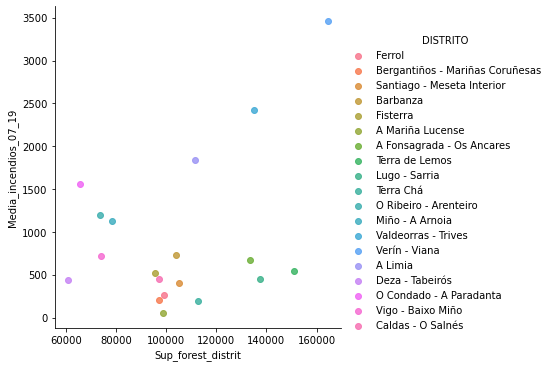

In [16]:
# Antes de empezar con machine learning, vamos a ver qué podemos esperar
# Usamos matplot:

# importar todas las funciones de pylab
from pylab import *

# importar el módulo pyplot
import matplotlib.pyplot as plt

# import numpy as np

y = df_00["Media_incendios_07_19"]
x = df_00["Sup_forest_distrit"]
z = df_00["DISTRITO"]

# plt.scatter(x, y, legend=True)
# plt.show()

import seaborn as sns

sns.lmplot('Sup_forest_distrit', 'Media_incendios_07_19', data=df_00, fit_reg=False, hue='DISTRITO')
# ¿Cómo poner el nº de distrito en vez de un punto más grande? 

# probar un modelo k-kneibours regression
# 

Vemos que hay dos ramas: en una parte de los distritos los incendios crecen con la superficie, mientras que en otros se mantienen constantes.

Una idea puede ser incluir solo a los distritos que aumentan la tasa de incendio en relación a su superficie para un modelo de regresión, ya que de otro modo no puede ser nunca lineal la relación. Otro enfoque puede ser crear una categoría para cada rama, a mano o haciendo clustering.

Quizá un árbol de regresión o un k-neigbours sea mejor opción.

C:\Users\USUARIO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


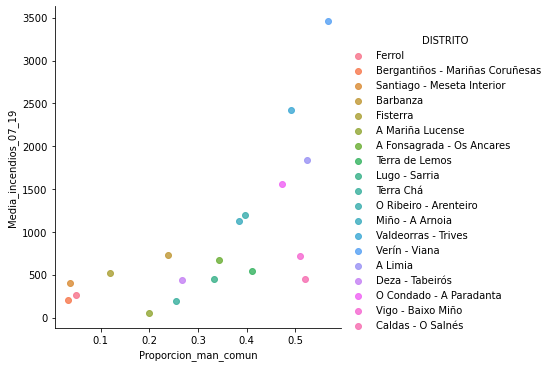

In [17]:
y = df_00["Media_incendios_07_19"]
x = df_00["Proporcion_man_comun"]
z = df_00["DISTRITO"]

sns.lmplot('Proporcion_man_comun', 'Media_incendios_07_19',
           data=df_00, fit_reg=False, hue='DISTRITO')

Vemos otra vez el mismo patron: se ven dos lineas:
Una para la cual la proporción de man común parece incrementar los incendios
Otra para la que no.

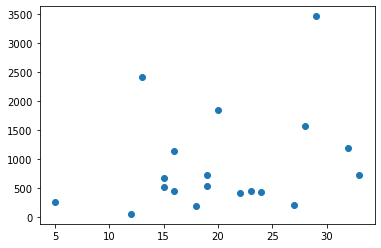

In [18]:
y = df_00["Media_incendios_07_19"]
x = df_00["% ocup medio coniferas"]

plt.scatter(x, y)
plt.show()


En este caso, la relación entre las variables parece aleatoria. Quizá convenga eliminar esta categoría del modelo

C:\Users\USUARIO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


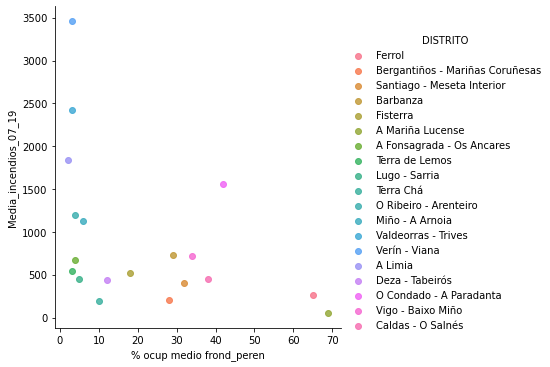

In [19]:
y = df_00["Media_incendios_07_19"]
x = df_00["% ocup medio frond_peren"]
z = df_00["DISTRITO"]

sns.lmplot('% ocup medio frond_peren', 'Media_incendios_07_19',
           data=df_00, fit_reg=False, hue='DISTRITO')

Aquí vemos que pese a tener mucha ocupación de eucaliptos, ciertos distritos tienen muy pocos incendios (caso de la mariña luguesa). 

Por otro lado, los distritos de la zona meditarránea (orense) tienen muy pocos eucaliptos y sin embargo tienen muchos incendios.

Veremos si pese a ello podemos entrenar un modelo que funcione.

C:\Users\USUARIO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


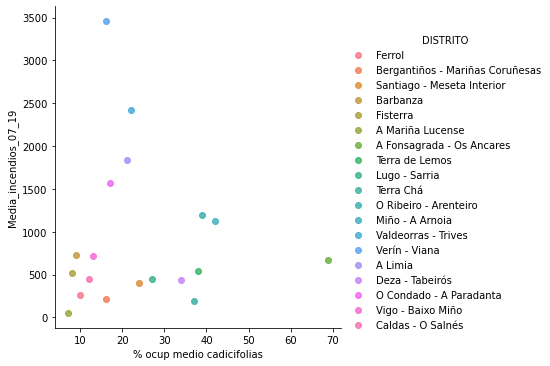

In [20]:

y = df_00["Media_incendios_07_19"]
x = df_00["% ocup medio cadicifolias"]
z = df_00["DISTRITO"]

sns.lmplot('% ocup medio cadicifolias', 'Media_incendios_07_19',
           data=df_00, fit_reg=False, hue='DISTRITO')

Observamos una tendencia clara a proporcionalidad negativa, que es lo que queremos demostrar:
Las mayores tasas de incendios ocurren donde hay pocas caducifolias.

C:\Users\USUARIO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


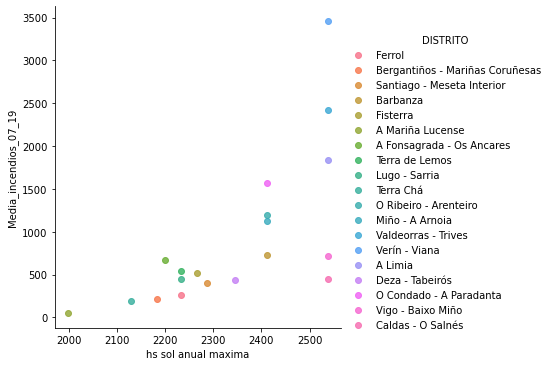

In [21]:

y = df_00["Media_incendios_07_19"]
x = df_00["hs sol anual maxima"]
z = df_00["DISTRITO"]

sns.lmplot('hs sol anual maxima', 'Media_incendios_07_19',
           data=df_00, fit_reg=False, hue='DISTRITO')

Un tendencia a proporcionalidad positiva

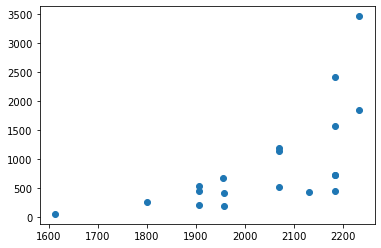

In [22]:
y = df_00["Media_incendios_07_19"]
x = df_00["Hs sol anual min"]

plt.scatter(x, y)
plt.show()


Un tendencia a proporcionalidad positiva

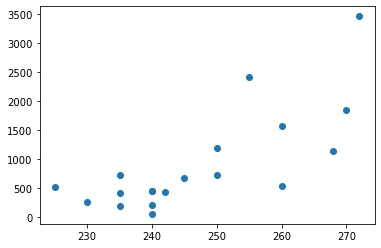

In [23]:

y = df_00["Media_incendios_07_19"]
x = df_00["Dias sol media anual"]

plt.scatter(x, y)
plt.show()


Un tendencia a proporcionalidad positiva

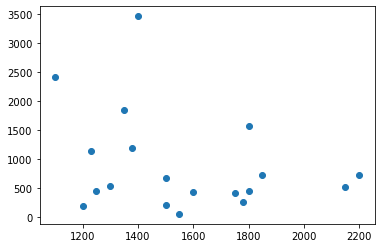

In [24]:
y = df_00["Media_incendios_07_19"]
x = df_00["Precipit anual media"]

plt.scatter(x, y)
plt.show()

existe una tendencia a proporción inversa bastante clara

Discusión de los datos:

A partir de las gráficas anteriores hemos sabido que:

Las horas y días de sol muestran una proporcionalidad clara con los incendios.
La presencia de caducifolias muestran una proporcionalidad inversa
La presencia de eucaliptos no tanto: la mariña luguesa tiene pocos incendios con muchos eucaliptos y las zonas meditarreas tienen muchos incendios con pocos eucaliptos. 
Con las coniferas no se observa un patrón claro en realción a la variable target.


Entrenando modelos

La Regresión lineal dio malos resultados (ver más abajo). Probaremos con un árbol de decisión y con un k-neighbours. 


# Arbol de regresión


In [25]:
#Primero, normalizamos

from sklearn import preprocessing

import pandas as pd
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
from sklearn.tree import DecisionTreeRegressor

df_sc = df_00.drop(columns=["Media_incendios_07_19", "num_distr", "DISTRITO",])
X_scaled = preprocessing.scale(df_sc)

X = X_scaled
y = df_00["Media_incendios_07_19"]

kf = KFold(n_splits = 3, shuffle = True)
kf.get_n_splits(X)

model = DecisionTreeRegressor(random_state=44)

# Creamos un vector donde vamos a estar guardando todos los resultados.
resultados = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index,], X[test_index,]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    predicciones = model.predict(X_test)
    print("R2: ", r2_score(y_test, predicciones))
    resultados.append(r2_score(y_test, predicciones))
print("R2 medio: ", np.mean(resultados))


R2:  -0.3597808095823696
R2:  0.3883927684948607
R2:  0.5671980964767558
R2 medio:  0.19860335179641564


La validacion tiene mucha varianza. No funciona, aún así, vamos a ver quñe resultado da:

In [26]:
# Luego de este bucle hago un fit sin split, para aprovechar todos los datos

model.fit(X, y)

DecisionTreeRegressor(random_state=44)

In [27]:
# Preparamos el escalado para alimentar el modelo:

X =  df_00_h[["Sup_forest_distrit", "Proporcion_man_comun",
              "% ocup hipotetico coniferas", "% ocup hipotetico frond_peren", 
              "% ocup hipotetico cadicifolias","hs sol anual maxima", 
              "Hs sol anual min", "Dias sol media anual", "Precipit anual media"]]

X= preprocessing.scale(X)

# Le metemos las predicciones al modelo original:

df_00_h["incendios_pred"]= model.predict(X)

# Y le añadimos el numero de distrito:

df_00_h[["Media_incendios_07_19","incendios_pred", "num_distr"]]



<ipython-input-27-8e1cace2237e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_00_h["incendios_pred"]= model.predict(X)


,Media_incendios_07_19,incendios_pred,num_distr
0,260.029231,402.957692,1
1,210.053846,189.440769,2
2,402.957692,402.957692,3
3,727.322308,727.322308,4
4,515.630000,515.630000,5
5,50.146923,50.146923,6
6,676.427692,722.275385,7
7,539.838462,1129.813846,8
8,449.512308,449.512308,9
9,189.440769,189.440769,10


Vemos que en efecto, hay over fitting y que en muchos casos, el modelo no ve que importe mucho 
qué especies haya. Más tarde discutiremos en qué distritos predice mejor que en otros y por qué.

! pip install openpyxl

# creating excel writer object
 
writer = pd.ExcelWriter('predicion_vs_actual.xlsx')

df_00_h.to_excel(writer)
 
# save the excel

writer.save()

# K-neighbors:

R2:  -0.40334427896720837
R2:  -1.502081257422248
R2:  0.24215599711585145
R2 medio:  -0.5544231797578684


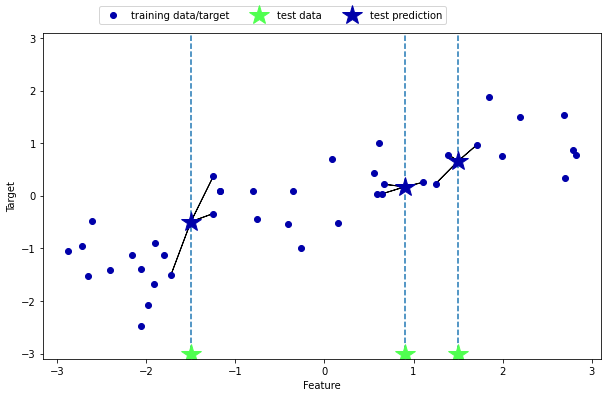

In [28]:
# Primero normalizamos 

df_sc = df_00.drop(columns=["Media_incendios_07_19", "num_distr", "DISTRITO",])
X_scaled = preprocessing.scale(df_sc)

# Definimos target y predictora

X = X_scaled
y = df_00["Media_incendios_07_19"]

# Preparamos k-fold

kf = KFold(n_splits = 3, shuffle = True)
kf.get_n_splits(X)


# Importamos librerías
# Exclamacion para ir a la shell

!pip install mglearn

import mglearn 
import matplotlib.pyplot as plt
mglearn.plots.plot_knn_regression(n_neighbors=3)

# Arrancamos el modelo neigh

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)


# Disparamos el bucle k-fold

resultados = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index,], X[test_index,]
    y_train, y_test = y[train_index], y[test_index]
    neigh.fit(X_train, y_train)
    predicciones = neigh.predict(X_test)
    print("R2: ", r2_score(y_test, predicciones))
    resultados.append(r2_score(y_test, predicciones))
print("R2 medio: ", np.mean(resultados))


In [33]:
# Probar con 3 y con 4 vecinos, volver a entrenar:
neigh.fit(X, y)

# Usarlo para predecir:
# Preparamos el escalado para alimentar el modelo:

X =  df_00_h[["Sup_forest_distrit", "Proporcion_man_comun",
              "% ocup hipotetico coniferas", "% ocup hipotetico frond_peren", 
              "% ocup hipotetico cadicifolias","hs sol anual maxima", 
              "Hs sol anual min", "Dias sol media anual", "Precipit anual media"]]

X= preprocessing.scale(X)

# Le metemos las predicciones al modelo original:

df_00_h["incendios_pred"]= neigh.predict(X)

# Y le añadimos el numero de distrito:

df_00_h[["Media_incendios_07_19","incendios_pred", "num_distr"]]



<ipython-input-33-6aa5c345f142>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_00_h["incendios_pred"]= neigh.predict(X)


,Media_incendios_07_19,incendios_pred,num_distr
0,260.029231,306.505769,1
1,210.053846,296.199231,2
2,402.957692,306.505769,3
3,727.322308,474.723462,4
4,515.630000,459.293846,5
5,50.146923,199.747308,6
6,676.427692,432.934231,7
7,539.838462,494.675385,8
8,449.512308,319.476538,9
9,189.440769,319.476538,10


Como vemos, en algunos distritos predice menos incendios, en otros más

Si se quisiera pasar excel el resultado:

writer = pd.ExcelWriter('predicion_vs_actual_knei.xlsx')

df_00_h.to_excel(writer)
 
# save the excel

writer.save()

# REGRESION LINEAL

Tenemo un problema: al escalar lo pasa a array y no soy capaz de volverlo a pasar a df.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd


# Primero normalizamos 

df_sc = df_00.drop(columns=["Media_incendios_07_19", "num_distr", "DISTRITO",])
X_scaled = preprocessing.scale(df_sc)

# Definimos target y predictora

X = X_scaled
y = df_00["Media_incendios_07_19"]


#define cross-validation method to use
cv = LeaveOneOut()

#build multiple linear regression model
model = LinearRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error = 719.3036314402557
# mean(absolute(scores))  


#view RMSE = 28.492546765156227   (= √Σ(Pi – Oi)2 / n) raiz del sumatorio diferencia obs-esp al cuadrado entre n
sqrt(mean(absolute(scores)))

# https://www.statology.org/leave-one-out-cross-validation/
# # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

28.492546765156227

 Parece que da algo decente, error medio de 719 hectáreas quemadas
 Vamos a probar a predecir a ver qué pasa
 

In [34]:

model.fit(X, y)

# Usarlo para predecir:
# Preparamos el escalado para alimentar el modelo:

X =  df_00_h[["Sup_forest_distrit", "Proporcion_man_comun",
              "% ocup hipotetico coniferas", "% ocup hipotetico frond_peren", 
              "% ocup hipotetico cadicifolias","hs sol anual maxima", 
              "Hs sol anual min", "Dias sol media anual", "Precipit anual media"]]

X= preprocessing.scale(X)

# Le metemos las predicciones al modelo original:

df_00_h["incendios_pred_regr"]= model.predict(X)

# Y le añadimos el numero de distrito:

df_00_h[["Media_incendios_07_19","incendios_pred_regr", "num_distr"]]



<ipython-input-34-1fa598bcc7c2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_00_h["incendios_pred_regr"]= model.predict(X)


,Media_incendios_07_19,incendios_pred_regr,num_distr
0,260.029231,27.071779,1
1,210.053846,439.538754,2
2,402.957692,622.496108,3
3,727.322308,895.848512,4
4,515.630000,154.903340,5
5,50.146923,-518.533906,6
6,676.427692,778.374684,7
7,539.838462,1392.871736,8
8,449.512308,627.452891,9
9,189.440769,178.627156,10


Como vemos, estos datos son muy caóticos. 
De hecho, en distritos de similares características arroja predicciones a la alta o a la baja, arbitraiamente.
No vale.


In [30]:
# Aquí probamos sin LeaveOneOut

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print("R cuadrado (train/test split): {}".format(r2_score(y_pred, y_test)))

# Ajuste con X e Y definidos con anterioridad.
regr.fit(X, y)

# Imprimimos el valor de las Betas... corresponden con los coeficientes de las variables dependientes 
# (en este caso sólo hay una).

print("Coeficientes: ", regr.coef_)

# El valor próximo a 1 nos indica que está cercano a la varianza, desviación al cuadrado respecto a la media.
# Estamos explicando el 86,9 % de la varianza.

y_pred = regr.predict(X)

# R2 nos va a decir cuán bueno es el modelo, cuanto más próximo a 1, el modelo es mejor.

print("R cuadrado: ", r2_score(y, y_pred))
 

R cuadrado (train/test split): 0.04442094481091563
Coeficientes:  [ 339.45022532 -197.36803631   30.92617419  218.44940987  -80.40459476
   43.0455586   568.96393477  441.11505798 -194.4804552 ]
R cuadrado:  0.81300379644344


Estos resultados son rarísimos. No vamos a tomarlos en cuenta.